In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [70]:
import numpy as np

In [71]:
import matplotlib.gridspec as gridspec
params = {'legend.fontsize':16,
          'figure.figsize': (8, 8),
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize':16,
         'ytick.labelsize': 16}
pylab.rcParams.update(params)

In [72]:
import matplotlib.ticker as mtick
def decibel_formatter(unit='dB'):
    def format_value(value, pos=None):
        dB = 10*np.log10(value)
        return f'{dB:.0f} {unit}'
    return format_value

In [6]:
def Mtx(mis,o):
    # solve S such (A+Z-2BR)S+B = 0 
    # mis : array [m(0),m(1),m(2)] 
    # o: order
    # return such  S(0)=1-2Sum_j S(j), S(j), j=1,...,o 
    o = int(o)
    assert o>=1, "o>=1 needed"
    A = np.zeros((o,o))
    Z = np.zeros((o,o))
    B = np.zeros((o,1))
    R = np.ones((1,o))
    #next A is a symmetric matrix... fill upper triangle included diag
    Z[0,0] = mis[2]
    B[0,0] = mis[1]    
    if o>=2:
        A[0,1] = mis[1]
        #
        B[1,0] = mis[2]
#    if o>=3:
#        A[0,2] = mis[2]
#        A[1,2] = mis[1]
    
    if o>=3:
        for c in range(2,o):
            A[c-1,c]=mis[1]
            A[c-2,c]=mis[2]
        #
        B[1,0] = mis[2]
    
#    else:
        #print("not yet")
    #print("1) A\n",A)
    A = A + A.T #- np.diag(np.diag(A))
    np.fill_diagonal(A, mis[0])
    #print("2) A\n",A)
    M = A+Z-2*B*R
    S = np.linalg.solve(M,-B).flatten()
    S = np.insert(S,0,1-2*np.sum(S),axis=0)        
    return S
                     
def Kval(n,m,s):
    n = int(np.abs(n))
    #order
    om = len(m)-1
    os = len(s)-1
    #print(om,os)
    # m(-2) S(n-2) + m(-1) S(n-1)+ m(0) S(n) +  m(1) S(n+1) + m(2)S(n+2)
    # m(-j)=m(j), S(-j) = S(j)
    #symetric ms
    ms = np.hstack((np.flip(m[1:]),m))
    ss = np.hstack((np.flip(s[1:]),s))
    #print("ms: ",ms)
    #print("ss: ",ss)
    # [n-2,n-1,n,n+1,n+2] in [-o,...,-1,0,1,..,o]
    if n-om>os:
        return 0
    else:
        idx1 = np.arange(-os,os+1)
        idx2 = np.arange(n-om,n+om+1)
        #print(idx1,idx2)
        xy, x_ind, y_ind = np.intersect1d(idx1, idx2, return_indices=True)
        #print(xy,x_ind,y_ind)
        #print(ms[y_ind[0]:y_ind[-1]+1],ss[x_ind[0]:x_ind[-1]+1])
        return np.dot(ms[y_ind[0]:y_ind[-1]+1],ss[x_ind[0]:x_ind[-1]+1])

In [18]:
mis=np.zeros(3)
#m_4
mis[0] = 2/3
mis[1] = 1/6

In [19]:
mis

array([0.66666667, 0.16666667, 0.        ])

In [20]:
for o in range(1,8):
    print(o,Mtx(mis,o))

1 [ 2.  -0.5]
2 [ 1.66666667 -0.44444444  0.11111111]
3 [ 1.75    -0.46875  0.125   -0.03125]
4 [ 1.72727273 -0.46280992  0.12396694 -0.03305785  0.00826446]
5 [ 1.73333333 -0.46444444  0.12444444 -0.03333333  0.00888889 -0.00222222]
6 [ 1.73170732e+00 -4.64009518e-01  1.24330756e-01 -3.33135039e-02
  8.92325996e-03 -2.37953599e-03  5.94883998e-04]
7 [ 1.73214286e+00 -4.64126276e-01  1.24362245e-01 -3.33227041e-02
  8.92857143e-03 -2.39158163e-03  6.37755102e-04 -1.59438776e-04]


SyntaxError: 'return' outside function (2010346904.py, line 3)

In [10]:
mis=np.zeros(3)
#m_6
mis[0] = 11/20
mis[1] = 13/60
mis[2] = 1/120

In [12]:
for o in range(1,8):
    print(o,Mtx(mis,o))

1 [ 4.46666667 -1.73333333]
2 [ 2.36489899 -1.06691919  0.3844697 ]
3 [ 3.07924242 -1.42409091  0.59877273 -0.21430303]
4 [ 2.74648759 -1.27593     0.55032616 -0.22984778  0.08220782]
5 [ 2.88450592 -1.34116344  0.58114573 -0.24899226  0.10392427 -0.03716725]
6 [ 2.82415686 -1.31330614  0.56956137 -0.24516221  0.10497024 -0.04380951
  0.01566783]
7 [ 2.84996677 -1.32534626  0.57487401 -0.24766081  0.10653255 -0.04561063
  0.01903555 -0.00680778]


In [13]:
S= Mtx(mis,7)

In [14]:
S

array([ 2.84996677, -1.32534626,  0.57487401, -0.24766081,  0.10653255,
       -0.04561063,  0.01903555, -0.00680778])

In [15]:
mis

array([0.55      , 0.21666667, 0.00833333])

In [16]:
Kval(0,mis,S)

1.0027462431363514

In [17]:
sum = 0
for n in range(0,11):
    kv = Kval(n,mis,S)
    if n==0:
        sum += kv
    else:
         sum += 2*kv
    print(n,Kval(n,mis,S))
print("Tot: ",sum)

0 1.0027462431363514
1 -1.450231531148099e-16
2 6.296536989190573e-17
3 -2.5389863088267755e-18
4 5.326652250039285e-18
5 1.145072350932389e-18
6 -8.599253376412011e-19
7 -6.059029014080881e-19
8 -0.0013163900439674171
9 -5.673152420850699e-05
10 0
Tot:  0.9999999999999996


In [67]:
def Bspline3(x):
  # nb. degre poly is 3
  x = np.abs(x,dtype=float)
  def p1(x):
    return 2./3.+1./2.* x * x * (x-2)
  def p2(x):
    return -1./6. *(x-2)*(x-2)*(x-2)
  return np.piecewise(x, [x<1., (x>=1.)&(x<2.), x>=2],[lambda x:p1(x),lambda x:p2(x),lambda x: 0.])

def hatBspline3(u):
  s = np.sinc(u)
  s2 = s*s
  return s2 * s2

In [69]:
def s3(n):
    n = n.astype(int)
    r3 = np.sqrt(3)
    return (-2*(n%2)+1)*r3/((2+r3)**(np.abs(n)))

def BsplineCard3(xin):
  xin = np.atleast_1d(xin,dtype=float)
  xshape=xin.shape
  x = xin.flatten()
  nmin = np.ceil(x-2).astype(int)
  nmax = np.floor(x+2).astype(int)
  res = []
  for i,x0 in enumerate(x):
    res.append(np.sum(np.array([s3(n)*Bspline3(x0-n) for n in np.arange(nmin[i],nmax[i]+1,1)])))
  return np.array(res).reshape(xshape)

In [90]:
def BSplineC3app(xin,o):
    if o==0:
        return Bspline3(xin)
    shapein = xin.shape
    mis = Bspline3(np.arange(0,3))
    s = Mtx(mis,o)
    L = len(s)-1
    ss = np.atleast_2d(np.hstack((np.flip(s[1:]),s)))
    bs = np.array([Bspline3(j-xin) for j in range(-L,L+1)])
    return np.dot(ss,bs).reshape(shapein)

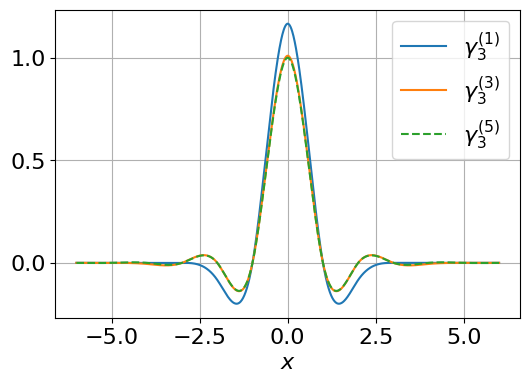

In [118]:
figure(figsize=(6,4))
xv = np.linspace(-6,6,1_000, endpoint=True)
style = ["-","-","--"]
for id,o in enumerate([1,3,5]):
    plot(xv,BSplineC3app(xv,o),label=fr"$\gamma_3^{{({o})}}$",ls=style[id])
xlabel(r"$x$")
grid()
legend();

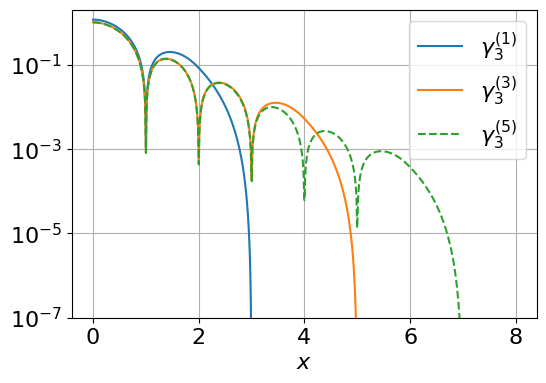

In [120]:
figure(figsize=(6,4))
xv = np.linspace(0,8,1_000, endpoint=True)
style = ["-","-","--"]
for id,o in enumerate([1,3,5]):
    plot(xv,np.abs(BSplineC3app(xv,o)),label=fr"$\gamma_3^{{({o})}}$",ls=style[id])
xlabel(r"$x$")
yscale("log")
ylim([1e-7,2])
grid()
legend();

In [38]:
def Kapp0(mis,omax=8):
    vals = []
    for o in range(1,omax):
        s = Mtx(mis,o)
        vals.append(Kval(0,mis,s))
    return np.array(vals)


In [40]:
mis3=np.zeros(3)
mis3[0] = 2/3
mis3[1] = 1/6
#
mis5=np.zeros(3)
mis5[0] = 11/20
mis5[1] = 13/60
mis5[2] = 1/120

3:  [1.16666667 0.96296296 1.01041667 0.99724518 1.00074074 0.99980171
 1.00005315 0.99998576 1.00000382]
5:  [1.70555556 0.84477062 1.08645682 0.96683728 1.01499319 0.99367963
 1.00274624 0.99882216 1.000508  ]


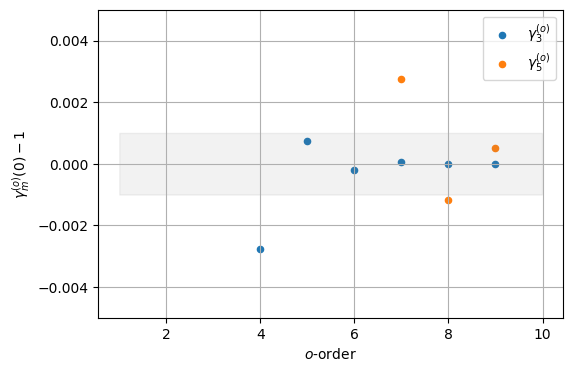

In [56]:
figure(figsize=(6,4))
omax = 10
K3app0 = Kapp0(mis3,omax)
K5app0 = Kapp0(mis5,omax)
print("3: ",K3app0)
print("5: ",K5app0)
scatter(np.arange(1,omax),K3app0-1,s=20,label=r"$\gamma_3^{(o)}$")
scatter(np.arange(1,omax),K5app0-1,s=20,label=r"$\gamma_5^{(o)}$")
fill_between(x=np.arange(1,omax,0.01), y1=0.001, y2=-0.001, color='gray',  interpolate=True, alpha=.1)
ylim([-0.005,0.005])
legend()
grid()
xlabel(r"$o$-order");
ylabel(r"$\gamma_m^{(o)}(0)-1$");


In [98]:
def hatBsplineC31(u):
    #gamma_3 approx o=1
    s = np.sinc(u)
    s2 = s*s
    c = np.cos(2. * np.pi * u)
    return (2 - c)*s2*s2

def hatBsplineC33(u):
     #gamma_3 approx o=3
    s = np.sinc(u)
    s2 = s*s
    c2 = np.cos(2. * np.pi * u)
    c4 = np.cos(4. * np.pi * u)
    c6 = np.cos(6. * np.pi * u)
    return -(-28 + 15*c2 - 4*c4 + c6 ) * s2 * s2/16

def hatBsplineC35(u):
    #gamma_3 approx o=5
    s = np.sinc(u)
    s2 = s*s
    c2 = np.cos(2. * np.pi * u)
    c4 = np.cos(4. * np.pi * u)
    c6 = np.cos(6. * np.pi * u)
    c8 = np.cos(8. * np.pi * u)
    c10= np.cos(10. * np.pi * u)
    return -(-390 + 209 * c2 - 56 * c4 + 15 * c6 -4 * c8 + c10) * s2 * s2/225

def hatBsplineC3(u):
    mis3=np.zeros(3)
    mis3[0] = 2/3
    mis3[1] = 1/6
    s = np.sinc(u)
    s2 = s*s
    c2 = np.cos(2. * np.pi * u)
    blur = mis3[0] + 2 * mis3[1]*c2
    return s2 * s2/blur

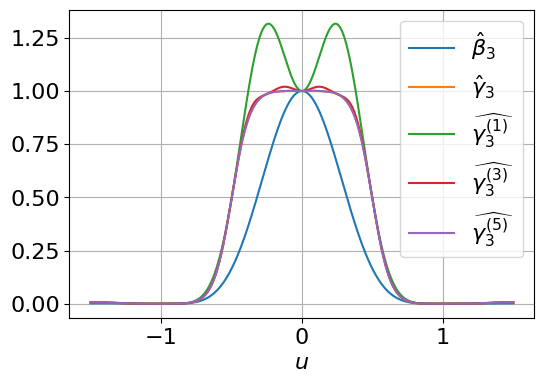

In [102]:
figure(figsize=(6,4))
us = np.linspace(-1.5,1.5,1_000)
plot(us,hatBspline3(us),label=r"$\hat{\beta}_3$")
plot(us,hatBsplineC3(us),label=r"$\hat{\gamma}_3$")
plot(us,hatBsplineC31(us),label=r"$\widehat{\gamma^{(1)}_3}$")
plot(us,hatBsplineC33(us),label=r"$\widehat{\gamma^{(3)}_3}$")
plot(us,hatBsplineC35(us),label=r"$\widehat{\gamma^{(5)}_3}$")
grid()
xlabel("$u$")
legend();


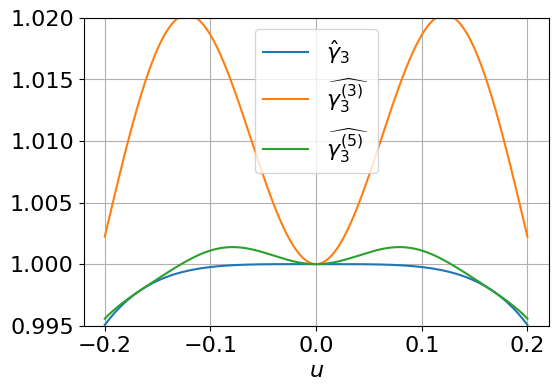

In [111]:
figure(figsize=(6,4))
us = np.linspace(-0.2,0.2,1_000)
#plot(us,hatBspline3(us),label=r"$\hat{\beta}_3$")
plot(us,hatBsplineC3(us),label=r"$\hat{\gamma}_3$")
#plot(us,hatBsplineC31(us),label=r"$\widehat{\gamma^{(1)}_3}$")
plot(us,hatBsplineC33(us),label=r"$\widehat{\gamma^{(3)}_3}$")
plot(us,hatBsplineC35(us),label=r"$\widehat{\gamma^{(5)}_3}$")
grid()
xlabel("$u$")
ylim([0.995,1.02])
legend();


In [122]:
def Unity(x,ker,Jmax=5):
  js = np.arange(-Jmax,Jmax+1)
  X,Y = np.meshgrid(x,js)
  kxpj = ker(X+Y)
  return np.sum(kxpj,axis=0)

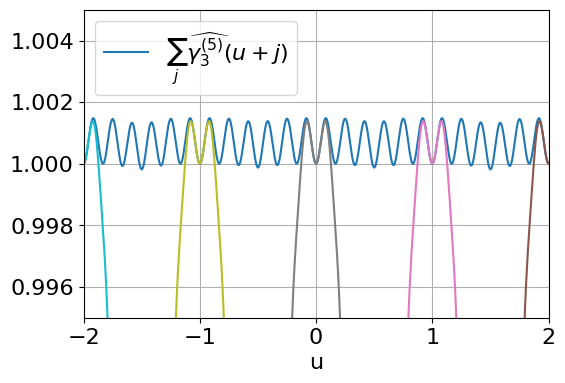

In [131]:
figure(figsize=(6,4))
xs=np.linspace(-4,4,1000,endpoint=True)
BsplineC35U = Unity(xs,hatBsplineC35)
plot(xs,BsplineC35U,label=r"$\sum_j \widehat{\gamma^{(5)}_3}(u+j)$")
for j in np.arange(-6,7):
  plot(xs,hatBsplineC35(xs+j))#,label=fr"$ \beta_4(x+{j}) $")
grid()
xlabel("u")
ylim([0.995,1.005])
xlim([-2,2])
legend(loc="upper left");